## Vectorization

In [1]:
import pandas as pd
import re
import nltk

import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### 1. Load Data

#### Open-ended Answers

In [2]:
activities = pd.read_csv('./data/activities.csv')

In [3]:
health = pd.read_csv('./data/health.csv')

In [4]:
home_safety = pd.read_csv('./data/home_safety.csv')

In [5]:
quantity_learning = pd.read_csv('./data/quantity_learning.csv')

In [6]:
radio_lessons = pd.read_csv('./data/radio_lessons.csv')

In [7]:
radio_likes = pd.read_csv('./data/radio_likes.csv')

In [8]:
school_safety = pd.read_csv('./data/school_safety.csv')

In [9]:
schoolwork = pd.read_csv('./data/schoolwork.csv')

In [10]:
learning_mat = pd.read_csv('./data/learning_mat.csv')

In [11]:
radio_school = pd.read_csv('./data/radio_school.csv')

## 2. Count vectorization function
Retrieve bi/trigrams tokens, refine and encode

In [12]:
stopwords = stopwords.words('english')

In [13]:
def removal(text):
    text = re.sub(r'(\d|\$|\%|\+)', '', text.lower())
    return re.sub(r'\d+', '', text)

In [14]:
def bow_vectorization(data, n_grams):
    vectorizer = CountVectorizer(stop_words = stopwords, lowercase = True, strip_accents='unicode', ngram_range=n_grams, preprocessor=removal)
    data_tokens = vectorizer.fit_transform(data.dropna())
    print(len(vectorizer.vocabulary_),'words in dictionary.')
    return pd.DataFrame(data_tokens.todense(), columns=vectorizer.get_feature_names())

## 3. Questions to vectorize

### 3.1. Are you doing other things at home to learn, aside from radio lessons? What are you doing?

Only those who answered "Yes" explained later what they were doing.

In [15]:
# Yes answer
activities[activities.iloc[:,0] == 'Yes'].notnull().sum()

Q34_Are you doing other things at home to learn, aside from radio lessons?    1499
Q35_What are you doing?                                                       1499
dtype: int64

In [16]:
# No answer
activities[activities.iloc[:,0] == 'No'].notnull().sum()

Q34_Are you doing other things at home to learn, aside from radio lessons?    1011
Q35_What are you doing?                                                          0
dtype: int64

Bigram vectorization

In [17]:
activities_bi = bow_vectorization(data = activities.iloc[:,-1], n_grams=(2, 2))

1149 words in dictionary.


In [18]:
activities_bi.sum().sort_values(ascending=False)[:30]

reading books        92
reading notes        47
text books           44
reading textbooks    35
previous work        32
read books           32
reading text         31
revising books       30
holiday package      29
study books          29
revising notes       25
group discussion     25
previous lessons     20
revised previous     16
studying books       16
revise books         15
exercise books       15
fetching water       14
revising previous    13
holiday packages     13
reading home         12
free time            11
work reading         11
home work            11
reading holiday      10
notes books          10
previous notes       10
old notes            10
house activities     10
looking goats        10
dtype: int64

See and group most important answers

In [19]:
activities_bi['reading'] = activities_bi[['reading previous','reading home','reading book','reading books', 'reading notes', 'text books', 'reading textbooks', 'read books', 'reading text', 'reading textbooks','reading holiday']].sum(axis=1)
activities_bi.drop(['reading previous','reading home','reading book','reading books', 'reading notes', 'text books', 'reading textbooks', 'read books', 'reading text', 'reading textbooks','reading holiday'], axis=1, inplace=True)

In [20]:
activities_bi['revising'] = activities_bi[['revised previous','previous lessons','revise previous','revising notes', 'revising books', 'revise books', 'revising previous','revising books', 'study books','old notes', 'previous notes']].sum(axis=1)
activities_bi.drop(['revised previous','previous lessons','revise previous','revising notes', 'revising books', 'revise books', 'revising previous','revising books', 'study books','old notes', 'previous notes'], axis=1, inplace=True)

In [21]:
activities_bi['reading'].sum(), activities_bi['revising'].sum()

(353, 206)

In [22]:
activities_bi.sum().sort_values(ascending=False)[:30]

reading                353
revising               206
previous work           32
holiday package         29
group discussion        25
studying books          16
exercise books          15
fetching water          14
holiday packages        13
free time               11
work reading            11
home work               11
looking goats           10
house activities        10
notes books             10
books home               9
personal studies         9
domestic work            9
studying home            9
fetch water              8
garden work              8
self studies             8
cooking fetching         7
practicing previous      7
group studies            7
playing foot             7
reading exercise         7
foot ball                7
reading playing          7
reading writing          7
dtype: int64

Visualization

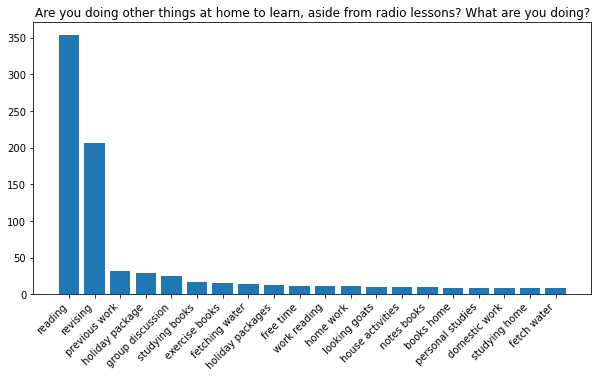

In [23]:
plt.figure(figsize=(10,5))
plt.bar(activities_bi.sum().sort_values(ascending=False).index[:20], activities_bi.sum().sort_values(ascending=False).values[:20])
plt.title('Are you doing other things at home to learn, aside from radio lessons? What are you doing?')
plt.xticks(rotation=45, ha='right')
plt.show()

Save vectors

In [24]:
activities_bi.to_csv('data/tokens/activities.csv')

### 3.2. Do you feel worried about your health due to studying/being at home during COVID-19? Why or why not?

In [25]:
health.iloc[:,0].value_counts()

Yes         772
No          528
Somewhat     75
Name: Q46_Do you feel worried about your health due to studying/being at home during COVID-19?, dtype: int64

Group 'Yes' and 'Somewhat' answers and separate them from the negative answers

In [26]:
health_yes = health[(health.iloc[:,0] == 'Yes') | (health.iloc[:,0] == 'Somewhat')].iloc[:,1]

In [27]:
health_no = health[health.iloc[:,0] == 'No'].iloc[:,1]

Bigram vectorization

In [28]:
health_yes_bi = bow_vectorization(data = health_yes, n_grams=(2, 4))

2991 words in dictionary.


In [29]:
health_no_bi = bow_vectorization(data = health_no, n_grams=(2, 2))

701 words in dictionary.


In [30]:
health_yes_bi.sum().sort_values(ascending=False)[:25]

corona virus                    34
covid infection                 23
want live                       22
lot things                      15
missing lot things              13
missing lot                     13
among people                    13
infection among                 12
staying home                    12
infection among people          12
covid infection among           11
covid infection among people    11
deadly disease                   9
dangerous disease                8
schools closed                   8
social distancing                7
kills people                     7
worried covid                    7
fear covid                       7
virus dangerous                  7
want infected                    6
many people                      6
due covid                        6
safe home                        6
study well                       6
dtype: int64

In [31]:
health_yes_bi['covid'] = health_yes_bi[['corona virus','covid infection','worried covid','fear covid','want infected','due covid']].sum(axis=1)
health_yes_bi.drop(['corona virus','covid infection','worried covid','fear covid','want infected','due covid'],axis=1, inplace=True)

In [32]:
health_yes_bi['missing lot things'] = health_yes_bi[['missing lot things','lot things','missing lot']].sum(axis=1)
health_yes_bi.drop(['missing lot things','lot things','missing lot'], axis=1, inplace=True)

In [33]:
health_yes_bi['infection among people'] = health_yes_bi[['infection among people','infection among','among people']].sum(axis=1)
health_yes_bi.drop(['infection among people','infection among','among people'], axis=1, inplace=True)

In [34]:
health_no_bi.sum().sort_values(ascending=False)[:26]

safe home                 56
home safe                 34
stay home                 24
feel safe                 19
staying home              16
home stay                 13
preventive measures       13
stay safe                 12
able protect              10
home safety                9
preventives measures       9
social distance            9
social distancing          7
following preventive       7
protect self               6
safe healthy               6
contact people             5
wash hands                 5
protect covid              5
corona virus               4
people home                4
family members             4
precautionary measures     3
home safer                 3
keeping social             3
died coronas               3
dtype: int64

In [35]:
health_no_bi['stay home'] = health_no_bi[['safe home','home safe', 'stay home','home stay','home safety','people home','home safer']].sum(axis=1)
health_no_bi.drop(['safe home','home safe', 'home stay','home safety','people home','home safer'], axis=1, inplace=True)

In [36]:
health_no_bi['social distance'] = health_no_bi[['social distance', 'social distancing']].sum(axis=1)
health_no_bi.drop('social distancing', axis=1, inplace=True)

Visualization

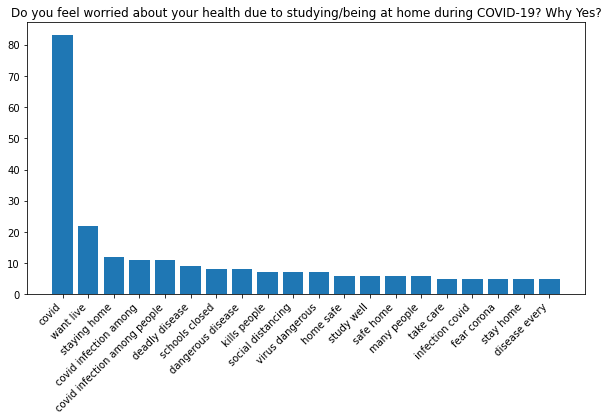

In [37]:
plt.figure(figsize=(10,5))
plt.bar(health_yes_bi.sum().sort_values(ascending=False).index[:20], health_yes_bi.sum().sort_values(ascending=False).values[:20])
plt.title('Do you feel worried about your health due to studying/being at home during COVID-19? Why Yes?')
plt.xticks(rotation=45, ha='right')
plt.show()

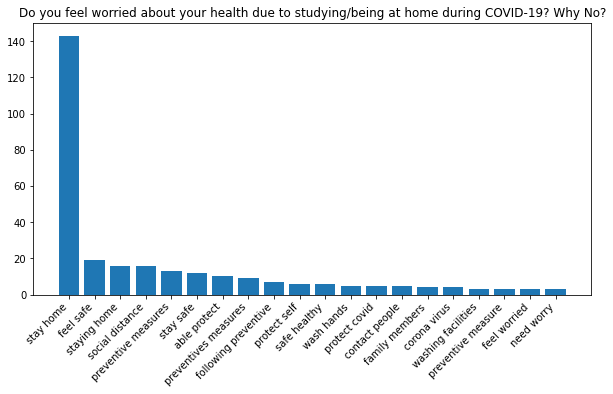

In [38]:
plt.figure(figsize=(10,5))
plt.bar(health_no_bi.sum().sort_values(ascending=False).index[:20], health_no_bi.sum().sort_values(ascending=False).values[:20])
plt.title('Do you feel worried about your health due to studying/being at home during COVID-19? Why No?')
plt.xticks(rotation=45, ha='right')
plt.show()

Save vectors

In [39]:
health_yes_bi.to_csv('data/tokens/heatl_home_yes.csv')
health_no_bi.to_csv('data/tokens/health_home_no.csv')

### 3.3. Do you feel worried about your safety due to being at home during COVID-19? Why or why not?

In [40]:
home_safety.iloc[:,0].value_counts()

Yes         666
No          648
Somewhat     61
Name: Q48_Do you feel worried about your safety due to being at home during COVID-19?, dtype: int64

Group 'Yes' and 'Somewhat' answers and separate them from the negative answers

In [41]:
home_safety_yes = home_safety[(home_safety.iloc[:,0] == 'Yes') | (home_safety.iloc[:,0] == 'Somewhat')].iloc[:,1]

In [42]:
home_safety_no = home_safety[home_safety.iloc[:,0] == 'No'].iloc[:,1]

Bigram vectorization

In [43]:
home_safety_yes_bi = bow_vectorization(data = home_safety_yes, n_grams=(2, 3))
home_safety_no_bi = bow_vectorization(data = home_safety_no, n_grams=(2, 3))

1936 words in dictionary.
1252 words in dictionary.


In [44]:
home_safety_yes_bi.sum().sort_values(ascending=False)[:25]

corona virus                 43
staying home                 15
fear corona                  14
disease affect               13
come home                    12
fear corona virus            11
safe home                    11
movements people             11
pandemic everywhere          11
fear disease                 11
social distancing            10
affect everywhere            10
people home                   9
want infected                 9
feel safe                     8
home safe                     8
staying home safe             7
many people                   7
feel safe home                7
dangerous disease             7
bring virus                   7
disease affect everywhere     7
people come                   7
people visit                  6
may bring                     6
dtype: int64

In [45]:
home_safety_yes_bi['covid'] = home_safety_yes_bi[['corona virus','fear corona','fear corona virus']].sum(axis=1)
home_safety_yes_bi.drop(['corona virus','fear corona','fear corona virus'], axis=1, inplace=True)

In [46]:
home_safety_yes_bi['safe home '] = home_safety_yes_bi[['feel safe','feel safe','home safe','staying home safe','feel safe home']].sum(axis=1)
home_safety_yes_bi.drop(['feel safe','feel safe','home safe','staying home safe','feel safe home'], axis=1, inplace=True)

In [47]:
home_safety_no_bi.sum().sort_values(ascending=False)[:25]

safe home                74
home safe                49
feel safe                34
social distancing        30
stay home                30
feel safe home           26
staying home             22
preventive measures      18
stay safe                17
safety measures          16
home stay                15
stay home stay           15
home stay safe           15
staying home safe        14
social distance          12
wash hands               10
home safety               9
safe healthy              9
home safe healthy         8
safety measures covid     7
washing hands             7
measures covid            7
take care                 6
come contact              5
following preventive      5
dtype: int64

In [48]:
home_safety_no_bi['safe home'] = home_safety_no_bi[['safe home', 'home safe', 'feel safe', 'stay home','stay safe','home stay','stay home stay','home stay safe','staying home safe','home safety','home safe healthy']].sum(axis=1)
home_safety_no_bi.drop(['home safe', 'feel safe', 'stay home','stay safe','home stay','stay home stay','home stay safe','staying home safe','home safety','home safe healthy'], axis=1, inplace=True)

Visualization

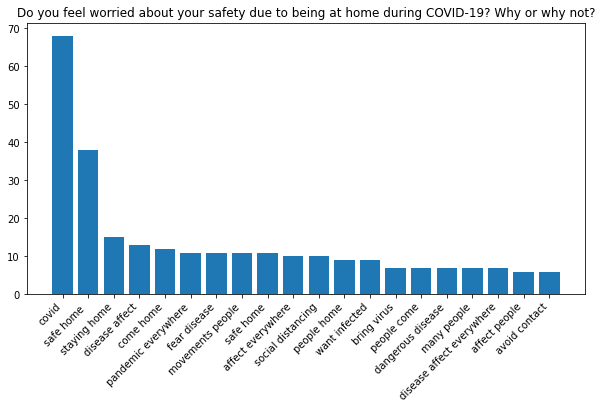

In [49]:
plt.figure(figsize=(10,5))
plt.bar(home_safety_yes_bi.sum().sort_values(ascending=False).index[:20], home_safety_yes_bi.sum().sort_values(ascending=False).values[:20])
plt.title('Do you feel worried about your safety due to being at home during COVID-19? Why or why not?')
plt.xticks(rotation=45, ha='right')
plt.show()

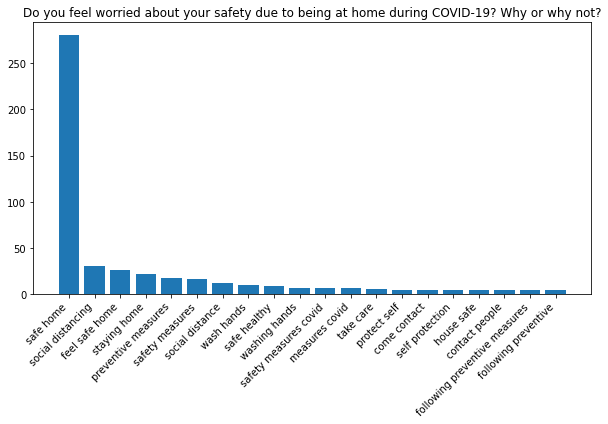

In [50]:
plt.figure(figsize=(10,5))
plt.bar(home_safety_no_bi.sum().sort_values(ascending=False).index[:20], home_safety_no_bi.sum().sort_values(ascending=False).values[:20])
plt.title('Do you feel worried about your safety due to being at home during COVID-19? Why or why not?')
plt.xticks(rotation=45, ha='right')
plt.show()

Save vectors

In [51]:
home_safety_no_bi.to_csv('data/tokens/safety_home_no.csv')
home_safety_yes_bi.to_csv('data/tokens/safety_home_yes.csv')

### 3.4. Are you/your learners learning more or are you learning less using radio lessons since the COVID-19 school closures? Why?

In [52]:
quantity_learning.iloc[:,0].value_counts()

Less        1249
More          80
The same      46
Name: Q52_Are you/your learners learning more or are you learning less using radio lessons since the COVID-19 school closures?, dtype: int64

Divide 'Less' and 'More' answers

In [53]:
quantity_learning_less = quantity_learning[quantity_learning.iloc[:,0] == 'Less'].iloc[:,1]
quantity_learning_more = quantity_learning[quantity_learning.iloc[:,0] == 'More'].iloc[:,1]

Trigram vectorization

In [54]:
quantity_learning_less_tri = bow_vectorization(data = quantity_learning_less, n_grams=(3, 3))
quantity_learning_more_tri = bow_vectorization(data = quantity_learning_more, n_grams=(3, 3))

1195 words in dictionary.
100 words in dictionary.


In [55]:
quantity_learning_less_tri.sum().sort_values(ascending=False)[:25]

engaged domestic works          5
engaged community activities    5
time listen radio               5
time radio lessons              5
listen radio lessons            4
teachers around help            4
time engaged domestic           4
listening radio lessons         4
much work home                  4
engaged domestic work           4
understand radio lessons        3
domestic work limits            3
follow radio program            3
know time radio                 3
time teachers hurry             3
engaged domestic activities     3
time attend radio               3
much domestic work              3
domestic work home              3
work limits study               3
time enough learners            3
attending radio lessons         3
balancing domestic work         2
timing radio lessons            2
radio coverage low              2
dtype: int64

In [56]:
quantity_learning_less_tri['time listen radio'] = quantity_learning_less_tri[['time listen radio','time radio lessons','listen radio lessons','listening radio lessons']].sum(axis=1)
quantity_learning_less_tri.drop(['time radio lessons','listen radio lessons','listening radio lessons'], axis=1, inplace=True)

In [57]:
quantity_learning_more_tri.sum().sort_values(ascending=False)[:25]

listen radio lessons           2
listens radio lessons          2
revised previous lessons       2
work less reading              1
hope come back                 1
every time listen              1
everyday listens radio         1
follow lessons broadcasted     1
forgot taught school           1
get passed knowledge           1
gives different information    1
helping studies radio          1
home helping studies           1
home radio near                1
language make us               1
keep us active                 1
learned lessons radio          1
learned new things             1
learning enough since          1
learning lessons radio         1
learning radio lessons         1
learnt new terms               1
lessons able compile           1
lessons absence schools        1
enough since closure           1
dtype: int64

In [58]:
quantity_learning_more_tri['listen radio lessons'] = quantity_learning_more_tri[['listen radio lessons','listens radio lessons','learning radio lessons']].sum(axis=1)
quantity_learning_more_tri.drop(['listens radio lessons','learning radio lessons'], axis=1, inplace=True)

Visualization

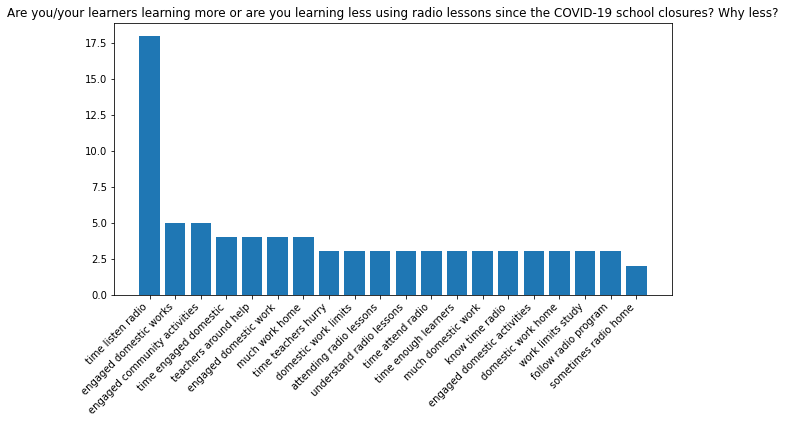

In [59]:
plt.figure(figsize=(10,5))
plt.bar(quantity_learning_less_tri.sum().sort_values(ascending=False).index[:20], quantity_learning_less_tri.sum().sort_values(ascending=False).values[:20])
plt.title('Are you/your learners learning more or are you learning less using radio lessons since the COVID-19 school closures? Why less?')
plt.xticks(rotation=45, ha='right')
plt.show()

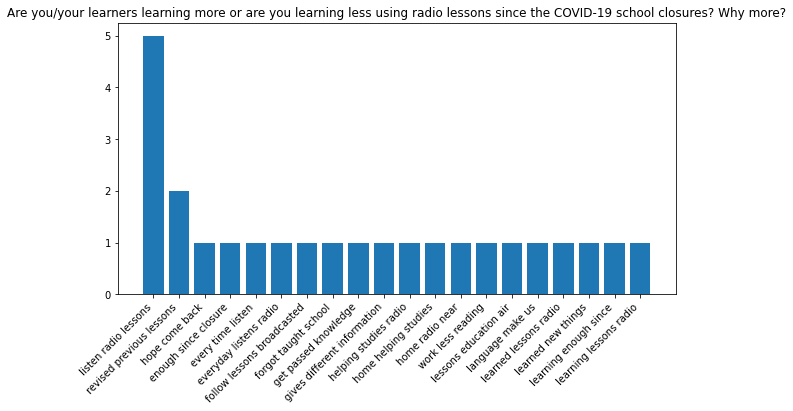

In [60]:
plt.figure(figsize=(10,5))
plt.bar(quantity_learning_more_tri.sum().sort_values(ascending=False).index[:20], quantity_learning_more_tri.sum().sort_values(ascending=False).values[:20])
plt.title('Are you/your learners learning more or are you learning less using radio lessons since the COVID-19 school closures? Why more?')
plt.xticks(rotation=45, ha='right')
plt.show()

Save vectors

In [61]:
quantity_learning_less_tri.to_csv('data/tokens/quantity_learning_less.csv')
quantity_learning_more_tri.to_csv('data/tokens/quantity_learning_more.csv')

### 3.5. What is the quality of the radio lessons? How can the radio lessons be improved?

In [62]:
radio_lessons.iloc[:,0].value_counts()

Good         644
Fair         396
Not good     186
Very good    149
Name: Q57_What is the quality of the radio lessons? , dtype: int64

Group 'Good' with 'Very Good' and 'Not good' with 'Fair'

In [63]:
radio_lessons_pos = radio_lessons[(radio_lessons.iloc[:,0] == 'Good') | (radio_lessons.iloc[:,0] == 'Very Good')].iloc[:,1]

In [64]:
radio_lessons_neg = radio_lessons[(radio_lessons.iloc[:,0] == 'Fair') | (radio_lessons.iloc[:,0] == 'Not Good')].iloc[:,1]

Trigram Vectorization

In [65]:
radio_lessons_pos_tri = bow_vectorization(data = radio_lessons_pos, n_grams=(3, 3))
radio_lessons_neg_tri = bow_vectorization(data = radio_lessons_neg, n_grams=(3, 3))

1141 words in dictionary.
752 words in dictionary.


In [66]:
radio_lessons_pos_tri.sum().sort_values(ascending=False)[:30]

extension radio coverage        20
provision radios learners        8
radio coverage areas             7
local radio stations             4
subjects need introduced         4
fine tune radio                  4
radio given learners             4
translated local language        3
distribution radio learners      3
distribution radios learners     3
distribution solar radios        3
needs radios given               3
radio lessons guided             3
need enough time                 3
enough time given                3
give time lessons                3
reducing speeding provide        3
solar radios students            2
lessons could improved           2
provision radio learners         2
distribution free radio          2
providing radios students        2
distribute many radios           2
lesson provide radios            2
coverage areas county            2
provision radios everyone        2
time every class                 2
lessons guided teachers          2
lessons repeated sev

In [67]:
radio_lessons_pos_tri['extension radio coverage'] = radio_lessons_pos_tri[['extension radio coverage','radio coverage areas','coverage areas county']].sum(axis=1)
radio_lessons_pos_tri.drop(['radio coverage areas','coverage areas county'], axis=1, inplace=True)

In [68]:
radio_lessons_pos_tri['provision radios learners'] = radio_lessons_pos_tri[['provision radios learners','radio given learners','distribution radio learners','distribution radios learners','needs radios given','provision radio learners','distribution free radio','providing radios students','distribute many radios','provision radios everyone']].sum(axis=1)
radio_lessons_pos_tri.drop(['radio given learners','distribution radio learners','distribution radios learners','needs radios given','provision radio learners','distribution free radio','providing radios students','distribute many radios','provision radios everyone'], axis=1, inplace=True)

In [69]:
radio_lessons_pos_tri['need enough time'] = radio_lessons_pos_tri[['need enough time','enough time given','give time lessons','time every class']].sum(axis=1)
radio_lessons_pos_tri.drop(['enough time given','give time lessons','time every class'], axis=1, inplace=True)

In [70]:
radio_lessons_neg_tri.sum().sort_values(ascending=False)[:30]

provide learners radio           8
provide radio learners           7
radio given learners             4
lengthening broadcasting time    4
provide radios learners          4
radio distributed learners       3
distribution solar radios        3
enough time given                3
distribution radios learners     3
broadcasting time etc            2
evening pm pm                    2
local radio stations             2
number hours increase            2
provide radios students          2
provide learners radios          2
increase time lessons            2
teachers guide learner           2
like teachers neare              2
radio lessons improved           2
fine tune radio                  2
languages lower classes          2
programs enough time             2
extension radio coverage         2
unless number hours              2
program local radios             2
strong signal programs           2
uses local languages             2
provision radio learners         2
providing radios stu

In [71]:
radio_lessons_neg_tri['provide radios'] = radio_lessons_neg_tri[['provide learners radio','provide radio learners','radio given learners','provide radios learners','radio distributed learners','distribution radios learners','provide radios students','provide learners radios','provision radio learners', 'providing radios students']].sum(axis=1)
radio_lessons_neg_tri.drop(['provide learners radio','provide radio learners','radio given learners','provide radios learners','radio distributed learners','distribution radios learners','provide radios students','provide learners radios','provision radio learners', 'providing radios students'], axis=1, inplace=True)

In [72]:
radio_lessons_neg_tri['lengthening time'] = radio_lessons_neg_tri[['lengthening broadcasting time', 'enough time given','broadcasting time etc','evening pm pm','number hours increase','increase time lessons']].sum(axis=1)
radio_lessons_neg_tri.drop(['lengthening broadcasting time', 'enough time given','broadcasting time etc','evening pm pm','number hours increase','increase time lessons'], axis=1, inplace=True)

Visualization

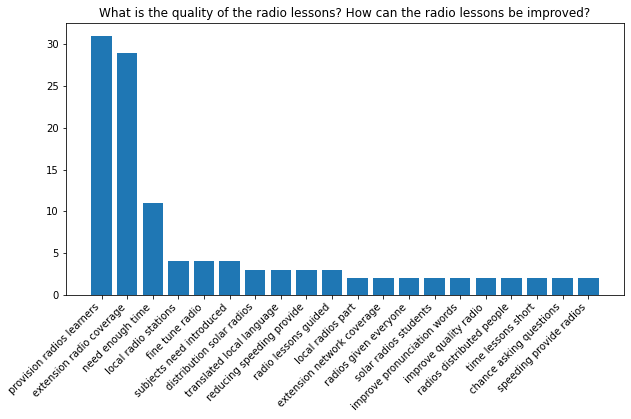

In [73]:
plt.figure(figsize=(10,5))
plt.bar(radio_lessons_pos_tri.sum().sort_values(ascending=False).index[:20], radio_lessons_pos_tri.sum().sort_values(ascending=False).values[:20])
plt.title('What is the quality of the radio lessons? How can the radio lessons be improved?')
plt.xticks(rotation=45, ha='right')
plt.show()

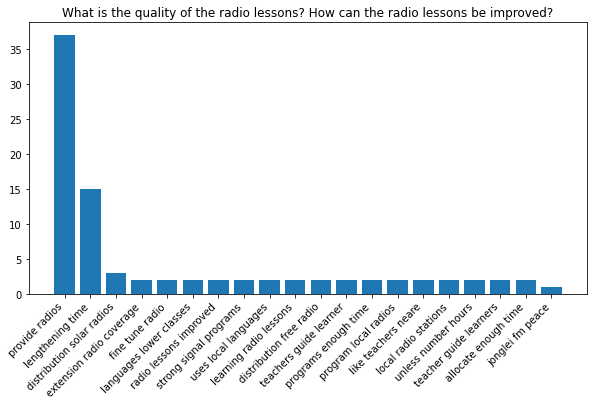

In [74]:
plt.figure(figsize=(10,5))
plt.bar(radio_lessons_neg_tri.sum().sort_values(ascending=False).index[:20], radio_lessons_neg_tri.sum().sort_values(ascending=False).values[:20])
plt.title('What is the quality of the radio lessons? How can the radio lessons be improved?')
plt.xticks(rotation=45, ha='right')
plt.show()

Save vectors

In [75]:
radio_lessons_pos_tri.to_csv('data/tokens/radio_lessons_qual_pos.csv')
radio_lessons_neg_tri.to_csv('data/tokens/radio_lessons_qual_neg.csv')

### 3.6. What do you like most about the radio lessons? What are the challenges with learning on the radio?

Bigram vectorization

In [76]:
radio_likes_bi = bow_vectorization(data = radio_likes.iloc[:,1], n_grams=(2, 2))

2837 words in dictionary.


In [77]:
radio_likes_bi.sum().sort_values(ascending=False)[:30]

lack radios             45
lack radio              40
radio lessons           36
ask questions           30
radio battery           29
network problem         27
poor network            25
radio home              22
limited time            20
hard understand         19
difficult understand    17
time enough             17
radio coverage          17
difficult ask           17
time limited            16
net work                15
radio program           14
lack power              13
asking questions        13
ask question            13
access radio            12
sometimes radio         12
time short              11
asks questions          11
poor net                11
radio lesson            10
faster radio            10
air time                10
time broadcasting       10
lack air                 9
dtype: int64

In [78]:
radio_likes_bi['limited time'] = radio_likes_bi[['limited time', 'time enough','time limited','time short','air time','time broadcasting']].sum(axis=1)
radio_likes_bi.drop(['time enough','time limited','time short','air time','time broadcasting'], axis=1, inplace=True)

In [79]:
radio_likes_bi['hard understand'] = radio_likes_bi[['hard understand', 'difficult understand']].sum(axis=1)
radio_likes_bi.drop('difficult understand', axis=1, inplace=True)

In [80]:
radio_likes_bi['lack radios'] = radio_likes_bi[['lack radios', 'lack radio','access radio']].sum(axis=1)
radio_likes_bi.drop(['lack radio','access radio' ], axis=1, inplace=True)

In [81]:
radio_likes_bi['ask questions'] = radio_likes_bi[['ask questions', 'difficult ask','asking questions','ask question','asks questions']].sum(axis=1)
radio_likes_bi.drop([ 'difficult ask','asking questions','ask question','asks questions'], axis=1, inplace=True)

In [82]:
radio_likes_bi['network problem'] = radio_likes_bi[['network problem', 'poor network','radio coverage','net work','poor net']].sum(axis=1)
radio_likes_bi.drop(['poor network','radio coverage','net work','poor net'], axis=1, inplace=True)

Visualization

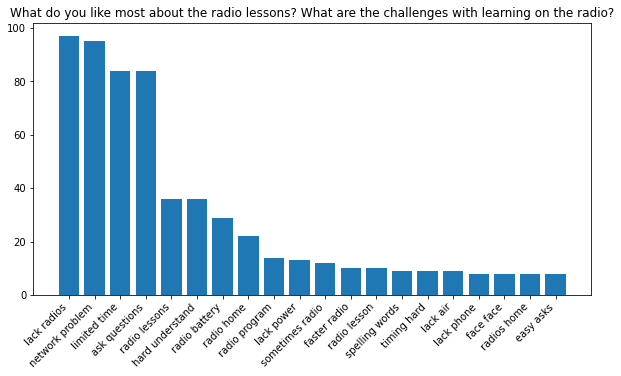

In [83]:
plt.figure(figsize=(10,5))
plt.bar(radio_likes_bi.sum().sort_values(ascending=False).index[:20], radio_likes_bi.sum().sort_values(ascending=False).values[:20])
plt.title('What do you like most about the radio lessons? What are the challenges with learning on the radio?')
plt.xticks(rotation=45, ha='right')
plt.show()

Save vectors

In [84]:
radio_likes_bi.to_csv('data/tokens/radio_likes.csv')

### 3.7.a. When schools re-open, do you think your school will have measures in place to ensure a safe learning environment? Why or why not?

In [85]:
school_safety.iloc[:,0].value_counts()

Yes         2181
No          1027
Somewhat     715
Name: Q61_When schools re-open, do you think your school will have measures in place to ensure a safe learning environment?, dtype: int64

Group 'Yes' and 'Somewhat' answers and separate them from the negative answers

In [86]:
school_safety_pos = school_safety[(school_safety.iloc[:,0] == 'Yes') | (school_safety.iloc[:,0] == 'Somewhat')].iloc[:,1]
school_safety_neg = school_safety[(school_safety.iloc[:,0] == 'No')].iloc[:,1]

In [87]:
school_safety_pos.tolist()[:10]

['Because we shall follow classroom rules and school regulations',
 'Creation of structures and routines in the school',
 'Keeping classroom clean orderly',
 'Creation of classroom safety rules',
 'Following the rules and regulations of school',
 "Because I'm ready to receive daily lessons and follow school rules and regulations",
 'Observing social distancing and classroom cleaning',
 'Keeping whole school environment clean',
 'Keeping classroom clean',
 'Safety of school environment']

In [88]:
school_safety_neg.tolist()[:10]

['Because school environment is very dirty, no teaching aids in our school and no sitting benches in our school',
 "Because I don't know anything about measures in place to ensure safe learning environment",
 "Because I'm not  sure of  measures in place to ensure safe learning environment",
 "Because I'm not sure whether COVID_19 is over in South Sudan",
 'No enough classroom',
 "I don't know",
 "I don't know",
 'No hand washing facilities',
 "I don't know what the school authority will put in place for safety of the people",
 "I don't know"]

Ngrams Vectorization

In [89]:
school_safety_a_pos_ng = bow_vectorization(data = school_safety_pos, n_grams=(4, 4))
school_safety_a_neg_ng = bow_vectorization(data = school_safety_neg, n_grams=(4, 4))

3143 words in dictionary.
544 words in dictionary.


In [90]:
school_safety_a_pos_ng.sum().sort_values(ascending=False)[:25]

administration ensure safety learners    69
school administration ensure safety      69
ensure safety learners school            23
keep school environment clean            16
hand washing facilities available        13
people learnt covid guidelines           13
general cleaning school environment      12
face masks wash hands                    12
provide hand washing facilities          11
aware covid preventive measures          11
face masks social distance               10
put face masks wash                      10
hands put face masks                      9
wash hands put face                       8
social distancing face mask               8
face mask hand washing                    7
ensure safety learners schools            7
ensure safety learners pandemic           7
people aware covid preventive             7
washing facilities face masks             6
keep school safe place                    6
social distancing must observed           6
school safe place learning      

In [91]:
school_safety_a_pos_ng['ensure safety'] = school_safety_a_pos_ng[['administration ensure safety learners',
                                                             'school administration ensure safety',
                                                             'ensure safety learners school',
                                                             'ensure safety learners schools',
                                                             'ensure safety learners pandemic',
                                                             'keep students safe school']].sum(axis=1)
school_safety_a_pos_ng.drop(['administration ensure safety learners',
                         'school administration ensure safety',
                         'ensure safety learners school',
                         'ensure safety learners schools',
                         'ensure safety learners pandemic',
                         'keep students safe school'], axis=1, inplace=True)

In [92]:
school_safety_a_pos_ng['hand washing facilities'] = school_safety_a_pos_ng[['hand washing facilities available',
                                                             'provide hand washing facilities',
                                                             'washing facilities face masks']].sum(axis=1)
school_safety_a_pos_ng.drop(['hand washing facilities available',
                             'provide hand washing facilities',
                             'washing facilities face masks'], axis=1, inplace=True)

In [93]:
school_safety_a_neg_ng.sum().sort_values(ascending=False)[:25]

enough hand washing facilities             4
ensure safe learning environment           4
place ensure safe learning                 3
measures place ensure safe                 3
know school authority put                  3
corona virus still present                 3
school authority put place                 3
need cleaning around school                2
pta member shall make                      2
bush need cleaning around                  2
washing facilities got spoiled             2
sure whether health personal               2
member shall make sure                     2
capacity acquire facilities fighting       2
sure measures place ensure                 2
one pta member shall                       2
enough safe learning environment           2
hand washing facilities got                2
clean around school company                2
masks hand washing facilities              2
cleaning around school company             2
school capacity acquire facilities         2
acquire fa

In [94]:
school_safety_a_neg_ng['need cleaning around school'] = school_safety_a_neg_ng[['need cleaning around school',
                                                             'bush need cleaning around',
                                                             'clean around school company',
                                                           'cleaning around school company']].sum(axis=1)
school_safety_a_neg_ng.drop(['bush need cleaning around',
                             'clean around school company',
                           'cleaning around school company'], axis=1, inplace=True)

In [95]:
school_safety_a_neg_ng['ensure safe learning environment'] = school_safety_a_neg_ng[['ensure safe learning environment',
                                                             'place ensure safe learning',
                                                             'measures place ensure safe',
                                                           'member shall make sure',
                                                                       'enough safe learning environment']].sum(axis=1)
school_safety_a_neg_ng.drop(['place ensure safe learning',
                                                             'measures place ensure safe',
                                                           'member shall make sure',
                                                                       'enough safe learning environment'], axis=1, inplace=True)

In [96]:
school_safety_a_neg_ng['hand washing facilities'] = school_safety_a_neg_ng[['enough hand washing facilities',
                                                             'washing facilities got spoiled',
                                                           'hand washing facilities got',
                                                                       'masks hand washing facilities']].sum(axis=1)
school_safety_a_neg_ng.drop(['enough hand washing facilities',
                             'washing facilities got spoiled',
                           'hand washing facilities got',
                                       'masks hand washing facilities'], axis=1, inplace=True)

Visualization

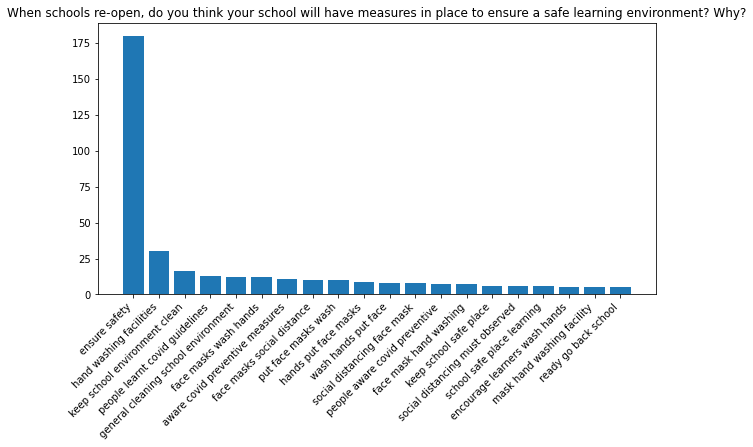

In [97]:
plt.figure(figsize=(10,5))
plt.bar(school_safety_a_pos_ng.sum().sort_values(ascending=False).index[:20], school_safety_a_pos_ng.sum().sort_values(ascending=False).values[:20])
plt.title('When schools re-open, do you think your school will have measures in place to ensure a safe learning environment? Why?')
plt.xticks(rotation=45, ha='right')
plt.show()

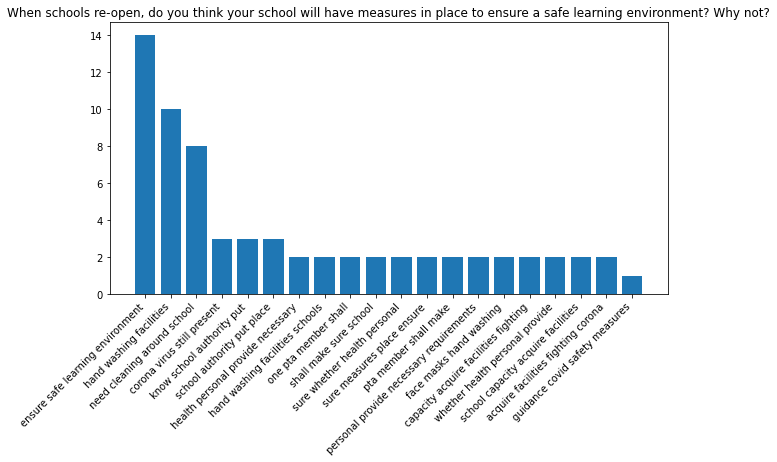

In [98]:
plt.figure(figsize=(10,5))
plt.bar(school_safety_a_neg_ng.sum().sort_values(ascending=False).index[:20], school_safety_a_neg_ng.sum().sort_values(ascending=False).values[:20])
plt.title('When schools re-open, do you think your school will have measures in place to ensure a safe learning environment? Why not?')
plt.xticks(rotation=45, ha='right')
plt.show()

Save vectors

In [99]:
school_safety_a_pos_ng.to_csv('data/tokens/safety_school_pos.csv')
school_safety_a_neg_ng.to_csv('data/tokens/safety_school_neg.csv')

### 3.7.b. What are your concerns about returning to school?

In [100]:
school_safety.iloc[:,2].dropna().tolist()[:50]

['Safety school environment for learning and quality education',
 'Social distancing and quality education',
 'Encouraging my colleagues in education',
 'Lessons and school time table',
 'Ready to receive lessons properly',
 'Attending lessons and share concerns with my colleagues',
 'Ready to attend lessons',
 'Sitting arrangement in classes',
 'Safety environment for learning',
 'Keeping school safe and supporting children',
 'Cleaning the whole school environment, and giving lessons to students.',
 'Encouraging all learners to go back for learning.',
 "I don't know",
 'Attending lessons',
 "I'm ready to go back for learning in things are in place",
 "I'm ready attend lessons in my school",
 'Attending lessons',
 'Preparing my self to rejoin school again',
 'Ready to go back to school for learning',
 'Ready to support our students in cleaning school environment',
 'Social distancing and other health safety measures plus quality education',
 'Quality learning',
 'Lessons for students'

Trigram Vectorization

In [101]:
school_safety_tri = bow_vectorization(data = school_safety.iloc[:,2], n_grams=(3, 3))

5445 words in dictionary.


In [102]:
school_safety_tri.sum().sort_values(ascending=False)[:25]

go back school               340
corona virus infection       108
virus infection fear          96
children go back              80
let schools reopen            75
ready go back                 72
let schools open              58
let school open               49
government reopen schools     43
need go back                  37
need school open              37
want go back                  37
back school learn             22
come back school              20
want school open              19
children go school            18
hand washing facility         18
wish school open              17
wants go back                 17
ready return school           17
back school continue          17
want children go              16
corona virus fear             16
need schools reopen           16
get back school               16
dtype: int64

In [103]:
school_safety_tri['corona virus infection'] = school_safety_tri[['corona virus infection','virus infection fear', 'corona virus fear']].sum(axis=1)
school_safety_tri.drop(['virus infection fear', 'corona virus fear'], axis=1, inplace=True)

In [104]:
school_safety_tri['want school open'] = school_safety_tri[['go back school','children go back', 'let schools reopen',
                                                        'let schools open',
                                                        'let school open',
                                                        'government reopen schools',
                                                        'need go back',
                                                        'want go back',
                                                        'back school learn',
                                                         'come back school',
                                                         'want school open',
                                                         'children go school',
                                                         'ready return school',
                                                         'back school continue']].sum(axis=1)
school_safety_tri.drop(['go back school',
                       'children go back',
                       'let schools reopen',
                       'let schools open',
                        'let school open',
                        'government reopen schools',
                        'need go back',
                        'want go back',
                        'back school learn',
                         'come back school',
                         'children go school',
                         'ready return school',
                         'back school continue'], axis=1, inplace=True)


Visualization

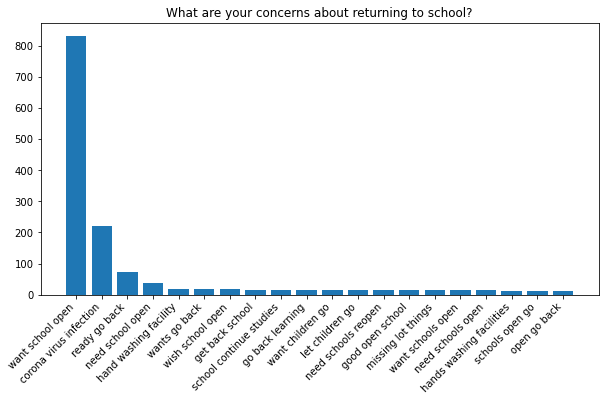

In [105]:
plt.figure(figsize=(10,5))
plt.bar(school_safety_tri.sum().sort_values(ascending=False).index[:20], school_safety_tri.sum().sort_values(ascending=False).values[:20])
plt.title('What are your concerns about returning to school?')
plt.xticks(rotation=45, ha='right')
plt.show()

Save vectors

In [106]:
school_safety_tri.to_csv('data/tokens/safety_school_concerns.csv')

### 3.8. Are you/your learners doing more schoolwork or less schoolwork since the COVID-19 school closures? Why?

In [107]:
schoolwork.iloc[:,0].value_counts()

Less        1159
More         177
The same      39
Name: Q50_Are you/your learners doing more schoolwork or less schoolwork since the COVID-19 school closures? , dtype: int64

Divide 'Less' from 'More'

In [108]:
schoolwork_less = schoolwork[schoolwork.iloc[:,0] == 'Less'].iloc[:,1]

In [109]:
schoolwork_more = schoolwork[schoolwork.iloc[:,0] == 'More'].iloc[:,1]

Ngrams Vectorization

In [110]:
schoolwork_less_ng = bow_vectorization(data = schoolwork_less, n_grams=(2, 3))
schoolwork_more_ng = bow_vectorization(data = schoolwork_more, n_grams=(2, 2))

2820 words in dictionary.
338 words in dictionary.


In [111]:
schoolwork_less_ng.sum().sort_values(ascending=False)[:25]

domestic work           63
work home               59
engaged activities      33
additional work         17
schools closed          15
extra work              14
house work              14
much work               13
home activities         13
lot work                13
activities home         12
additional work home    12
much domestic           11
much domestic work      11
engaged domestic        11
extra work home         11
home work               11
school work             11
garden work             10
radio lessons           10
busy home                9
heard get                9
time engaged             9
much work home           8
workloads home           8
dtype: int64

In [112]:
schoolwork_more_ng.sum().sort_values(ascending=False)[:25]

enough time            5
radio lessons          5
keep updated           4
time home              4
read books             3
previous lessons       3
holiday package        3
ample time             3
easy understand        3
many things            3
holiday packages       3
lessons home           3
reading books          3
reading holiday        3
reading home           3
home work              2
text books             2
parents gives          2
concentrate books      2
revised previous       2
plenty time            2
time concentrate       2
materials available    2
study hard             2
studied school         2
dtype: int64

Visualization

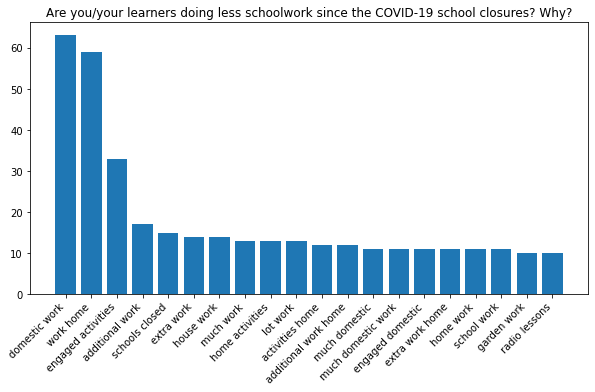

In [113]:
plt.figure(figsize=(10,5))
plt.bar(schoolwork_less_ng.sum().sort_values(ascending=False).index[:20], schoolwork_less_ng.sum().sort_values(ascending=False).values[:20])
plt.title('Are you/your learners doing less schoolwork since the COVID-19 school closures? Why?')
plt.xticks(rotation=45, ha='right')
plt.show()

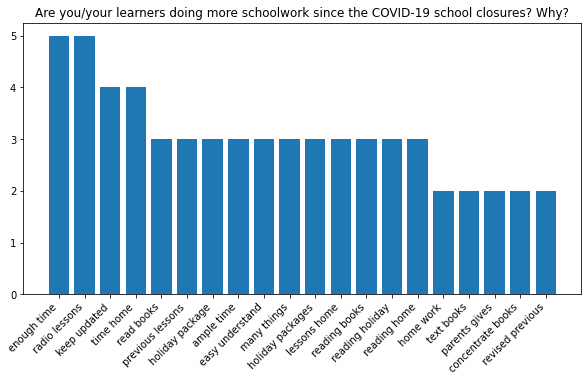

In [114]:
plt.figure(figsize=(10,5))
plt.bar(schoolwork_more_ng.sum().sort_values(ascending=False).index[:20], schoolwork_more_ng.sum().sort_values(ascending=False).values[:20])
plt.title('Are you/your learners doing more schoolwork since the COVID-19 school closures? Why?')
plt.xticks(rotation=45, ha='right')
plt.show()

Save vectors

In [115]:
schoolwork_less_ng.to_csv('data/tokens/schoolwork_less.csv')
schoolwork_more_ng.to_csv('data/tokens/schoolwork_more.csv')

### 3.9. When schools reopen, would you still listen to radio lessons? Why or why not?

In [116]:
radio_school.iloc[:,0].value_counts()

Yes    697
No     678
Name: Q59_When schools reopen, would you still listen to radio lessons?, dtype: int64

Divide 'Yes' from 'No'

In [117]:
radio_school_pos = radio_school[radio_school.iloc[:,0] == 'Yes'].iloc[:,1]

In [118]:
radio_school_neg = radio_school[radio_school.iloc[:,0] == 'No'].iloc[:,1]

Bigram Vectorization

In [119]:
radio_school_pos_bi = bow_vectorization(data = radio_school_pos, n_grams=(2, 3))
radio_school_neg_bi= bow_vectorization(data = radio_school_neg, n_grams=(2, 2))

1602 words in dictionary.
692 words in dictionary.


In [120]:
radio_school_pos_bi.sum().sort_values(ascending=False)[:25]

radio lessons              33
get knowledge              27
get information            15
add knowledge              14
additional knowledge       13
remained learners          11
increase knowledge         11
radio lesson               10
keeps remained             10
keeps remained learners    10
want learn                 10
learn radio                10
new things                 10
taught school               9
knowledge skills            8
get enough                  8
add information             8
help learners               8
enough knowledge            8
get new                     7
learn things                7
get news                    7
get enough knowledge        7
listening radio             7
get updates                 7
dtype: int64

In [121]:
radio_school_pos_bi['get knowledge'] = radio_school_pos_bi[['get knowledge', 'get information', 'add knowledge', 'additional knowledge','increase knowledge','add information']].sum(axis=1)
radio_school_pos_bi.drop(['get information', 'add knowledge', 'additional knowledge','increase knowledge','add information'], axis=1, inplace=True)

In [122]:
radio_school_neg_bi.sum().sort_values(ascending=False)[:25]

busy school           31
teachers school       24
teachers already      22
radio lessons         22
school open           22
school teach          18
time listen           17
school opened         16
going school          15
listen radio          13
already schools       13
school lessons        10
depend school          9
schools reopened       9
go school              9
school work            9
concentrate school     8
lessons school         8
concentrate class      8
moving school          8
every day              7
school time            7
time school            7
time radio             6
busy class             6
dtype: int64

In [123]:
radio_school_neg_bi['teachers already'] = radio_school_neg_bi[['teachers school','teachers already','already schools']].sum(axis=1)
radio_school_neg_bi.drop(['teachers school','already schools'], axis=1, inplace=True)

In [124]:
radio_school_neg_bi['busy school'] = radio_school_neg_bi[['busy school','school open',
                                                          'school teach','school opened',
                                                          'going school','concentrate school','lessons school']].sum(axis=1)
radio_school_neg_bi.drop(['busy school','school open',
                                                          'school teach','school opened',
                                                          'going school','concentrate school','lessons school'], axis=1, inplace=True)

Visualization

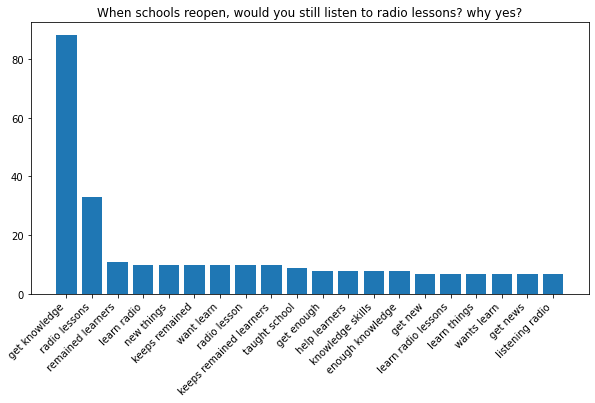

In [125]:
plt.figure(figsize=(10,5))
plt.bar(radio_school_pos_bi.sum().sort_values(ascending=False).index[:20], radio_school_pos_bi.sum().sort_values(ascending=False).values[:20])
plt.title('When schools reopen, would you still listen to radio lessons? why yes?')
plt.xticks(rotation=45, ha='right')
plt.show()

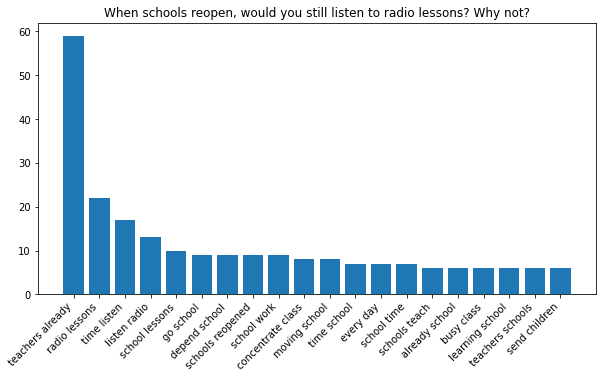

In [126]:
plt.figure(figsize=(10,5))
plt.bar(radio_school_neg_bi.sum().sort_values(ascending=False).index[:20], radio_school_neg_bi.sum().sort_values(ascending=False).values[:20])
plt.title('When schools reopen, would you still listen to radio lessons? Why not?')
plt.xticks(rotation=45, ha='right')
plt.show()

Save vectors

In [127]:
radio_school_pos_bi.to_csv('data/tokens/radio_school_pos.csv')
radio_school_neg_bi.to_csv('data/tokens/radio_school_neg.csv')

### 3.10. What materials are you using? How often do you use these materials? Do you find these materials more or less helpful than radio lessons? Why?

In [128]:
learning_mat.iloc[:,0].value_counts()

Textbooks                                                            550
Practice book from school                                            294
Textbooks Practice book from school                                  196
Other (specify)                                                      135
Study packets                                                         75
Textbooks Study packets Practice book from school                     47
Textbooks Study packets                                               43
Study packets Practice book from school                               42
Practice book from school Textbooks                                   30
Textbooks Other (specify)                                             20
Practice book from school Study packets                               11
Textbooks Practice book from school Study packets                     10
Practice book from school Other (specify)                              9
Study packets Other (specify)                      

Divide 'More' helpful from 'Less' helpful

In [129]:
learning_mat.iloc[:,2].value_counts()

More              805
Less              600
About the same     94
Name: Q38_Do you find these materials more or less helpful than radio lessons?, dtype: int64

In [130]:
learning_mat_more = learning_mat[learning_mat.iloc[:,2] == 'More'].iloc[:,3]
learning_mat_more.tolist()[:20]

['Because I see spelling correctly in text book',
 'Textbooks contain details and correct spelling',
 'Because of spelling details',
 'Textbooks contain details',
 'Because reading in text book is more useful than radio',
 'Because reading in the text books allow you to seek for help to the person near you',
 'Because of instruction given by teachers to read in practical books from school',
 'Because I was instructed to read in my practical books from school',
 'Because text book give correct spelling of words',
 'Because of good spelling',
 'Because is easy to understand',
 'Easy to understand',
 'Easy to understand and if difficulties look for the help',
 'I learn through it more than listening to the radio ',
 'Because my sister normally coach me and help me in my work',
 'Because you can get all the work in place',
 'More helpful than radio lessons.',
 'Easy to understand',
 "Some one with out radio can't understand what is happening.\nSo I read my books and I can understand it.",


In [131]:
learning_mat_less = learning_mat[learning_mat.iloc[:,2] == 'Less'].iloc[:,3]
learning_mat_less.tolist()[:20]

['Because radio lessons give good prounciation and new Vocabularies',
 'No time to read books',
 "Sometimes I don't understand and no one can do explanation to me",
 'Because most time we are playing',
 'Because of CoVID 19 interruption.',
 'No schooling',
 'Am still in Primary one',
 'No hope of schools opening',
 'Some time I miss the lessons on radio',
 'am reading primary six materials instead of primary eight',
 'They are not distributed to us',
 'More house chao.',
 'Needs teacher support',
 'No good explanation.',
 'Too much domestic work could not allow one to concentrate',
 'Less time',
 'Needs teacher support',
 'I like listening',
 'No one helping me',
 "I don't know the meaning of some words and no explain for me."]

Ngram Vectorization

In [132]:
learning_mat_more_ng = bow_vectorization(data = learning_mat_more, n_grams=(3, 3))
learning_mat_less_ng = bow_vectorization(data = learning_mat_less, n_grams=(4, 4))

914 words in dictionary.
364 words in dictionary.


In [133]:
learning_mat_more_ng.sum().sort_values(ascending=False)[:25]

helpful radio lessons           11
difficulties look help           6
easy understand difficulties     6
understand difficulties look     6
updating previous work           6
keeps updating previous          6
listen radio lessons             6
radio enough time                5
keeps busy reminds               5
understand radio lessons         5
easy understand radio            4
reminds previous work            4
know learn radio                 3
remember taught school           3
reading text books               3
cause much financial             3
time radio lessons               3
financial hiccups hence          3
bread per day                    3
per day matters                  3
hiccups hence getting            3
always found home                3
hence getting bread              3
pandemic cause much              3
easier understand radio          3
dtype: int64

In [134]:
learning_mat_more_ng['remember taught school'] = learning_mat_more_ng[['remember taught school','keeps busy reminds','reminds previous work']].sum(axis=1)
learning_mat_more_ng.drop(['remember taught school','keeps busy reminds','reminds previous work'], axis=1, inplace=True)

In [135]:
learning_mat_more_ng['difficulties look help'] = learning_mat_more_ng[['difficulties look help','easy understand difficulties','understand difficulties look','understand radio lessons','easy understand radio','easier understand radio']].sum(axis=1)
learning_mat_more_ng.drop(['easy understand difficulties','understand difficulties look','understand radio lessons','easy understand radio','easier understand radio'], axis=1, inplace=True)

In [136]:
learning_mat_less_ng.sum().sort_values(ascending=False)[:25]

interested like radio lesson          2
time engaged domestic works           2
time occupied domestic work           2
one explain new words                 2
home one explain like                 1
home especially physic mathematics    1
hard understand terms alone           1
hard understand us level              1
hear sound teacher radio              1
hear thing radio prefer               1
help one air said                     1
help parents part duty                1
help teacher could schools            1
help without teacher couch            1
helpful note books little             1
hope going back school                1
iam engage home activities            1
helping senior one learnt             1
home simplify hard things             1
holiday packages news taught          1
home ather activity time              1
home better lesson radio              1
home cannot allow read                1
helping home simplify hard            1
year revising notes always            1


In [137]:
learning_mat_less_ng['time engaged domestic works'] = learning_mat_less_ng[['time engaged domestic works','time occupied domestic work','home ather activity time','iam engage home activities']].sum(axis=1)
learning_mat_less_ng.drop(['time engaged domestic works','time occupied domestic work','home ather activity time','iam engage home activities'], axis=1, inplace=True)

In [138]:
learning_mat_less_ng['hear sound teacher radio'] = learning_mat_less_ng[['hear sound teacher radio','hear thing radio prefer','help one air said']].sum(axis=1)
learning_mat_less_ng.drop(['hear thing radio prefer','help one air said'], axis=1, inplace=True)

Visualization

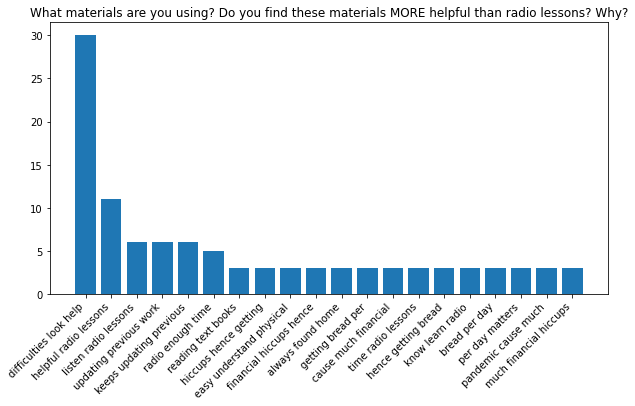

In [139]:
plt.figure(figsize=(10,5))
plt.bar(learning_mat_more_ng.sum().sort_values(ascending=False).index[:20], learning_mat_more_ng.sum().sort_values(ascending=False).values[:20])
plt.title('What materials are you using? Do you find these materials MORE helpful than radio lessons? Why?')
plt.xticks(rotation=45, ha='right')
plt.show()

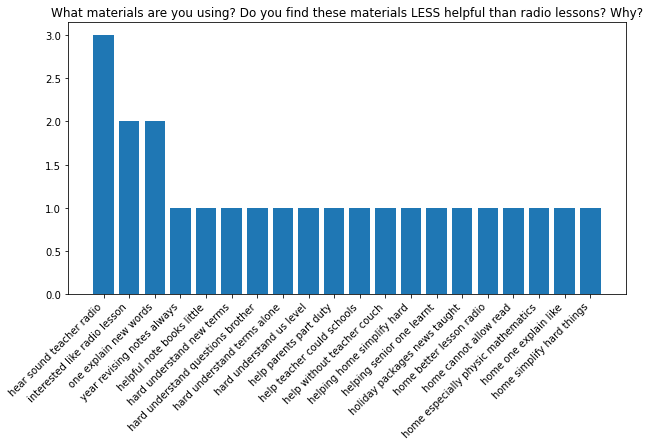

In [140]:
plt.figure(figsize=(10,5))
plt.bar(learning_mat_less_ng.sum().sort_values(ascending=False).index[:20], learning_mat_less_ng.sum().sort_values(ascending=False).values[:20])
plt.title('What materials are you using? Do you find these materials LESS helpful than radio lessons? Why?')
plt.xticks(rotation=45, ha='right')
plt.show()

Save vectors

In [141]:
learning_mat_more_ng.to_csv('data/tokens/learning_mat_more.csv')
learning_mat_less_ng.to_csv('data/tokens/learning_mat_less.csv')